In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
BIG_TITLE="CNN raw movement intention"

In [ ]:
### TIME WINDOWS
w1=768
w2=0
W1=w1
W2=w2

In [ ]:
### LIBRARIES

import tensorflow as tf
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import datetime
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import time
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas
import os

# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True 
from scipy.signal import butter, lfilter
import pywt
import pandas as pd
import numpy as np
import random
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import scipy
import scipy.signal
from scipy import fft
### LIBRARIES

import tensorflow as tf
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import datetime
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import time
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy
import pandas
import os

import os
import sys

import pandas as pd
import pandas
import numpy as np

import pywt
import scipy.io as spio
from scipy.stats import entropy
from collections import Counter

from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import timeit

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import LSTM, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from numpy import hstack, vstack, dstack
import numpy as np


In [ ]:
def load_signal(k):  #where k is the file name
    data = sio.loadmat(str(k))  
    ###deleting EOGs
    signal_raw= numpy.delete(data["signal"], obj= [63,62,61,60,59,58], axis=0)
    ###deleting 0s:
    signal_raw_trans= numpy.transpose(signal_raw)
    ind=[]
    for cx, c in enumerate(signal_raw_trans):
        if len(c) -  numpy.count_nonzero(c) <=5:
            continue
        else:
            ind.append(cx)
    g= numpy.delete(signal_raw_trans, obj= ind, axis=0)
    signal_raw_trans_clean=numpy.transpose(g)
    
    ###clean memory
    del data
    del signal_raw
    del signal_raw_trans
    del g

    return(signal_raw_trans_clean)

In [ ]:
### cleaned code names
def cleaned_code_names(k):# k=file name
    data = sio.loadmat(str(k)) 
    events= data["header"]["event_codes"]
    EVENTS=[]
    for i in events:
        for e in i:
            for j in e:
                for h in j:
                    if len(str(h))>2:
                        EVENTS.append(h)
    EVENTS=numpy.array(EVENTS)
    
    del data
    del events
    
    return EVENTS

In [ ]:
### cleaned event code
def event_Code(k): # k=file name
    data = sio.loadmat(str(k)) 
    
    labels= str(data["events"]["codes"]).split()
    
    l=[]
    for g in labels:
        for i in g:
            if i.isnumeric():
                l.append(i)
        else:
            l.append(",")
    #cleaning labels 
    l2=[]
    g=""
    for j in l:
        if j.isnumeric():
            g+=j
        elif len(g)<1:
            continue
        else:
            l2.append(int(g))
            g=""
    
    del data
    del labels
    del l
    del g
    
    return l2

### cleaned event position
def event_Position(k):# k=file name
    data = sio.loadmat(str(k)) 
    indices_signal_matrix= str(data["events"]["positions"]).split()
    #cleaning indices_signal_matrix 
    l3=[]
    for g in indices_signal_matrix:
        for i in g:
            if i.isnumeric():
                l3.append(i)
        else:
            l3.append(",")

    l4=[]
    g=""
    for j in l3:
        if j.isnumeric():
            g+=j
        elif len(g)<1:
            continue
        else:
            l4.append(int(g))
            g=""
    l4=l4[:-1]#array of i
    
    del data
    del indices_signal_matrix
    del l3
    del g
    
    return l4

In [ ]:
#indexes of each events within signals
def indexes_event_signals(k):
    data = sio.loadmat(str(k)) 
    EVENTS = cleaned_code_names(k)
    event_codes= event_Code(k)
    dico_indexes={}

    for event in EVENTS:
        indexes_=[]
        for ig, g in enumerate(event_codes):
            if g == event:
                indexes_.append(ig)
        dico_indexes[event]= indexes_
    
    del data
    del EVENTS
    del event_codes
    del indexes_
    
    return dico_indexes

In [ ]:
def start_indexes(k, event):# k= file name, starting_event= code of grasp onset, ending_event:code of grasp offset
    indexes=indexes_event_signals(k)
    event_positions= event_Position(k)
    event_indexes=[]
    
    for h in indexes[event]:
        event_indexes.append(event_positions[h])
    
    del indexes
    del event_positions
    
    return event_indexes

In [ ]:
#signals of movement types (signal of split() function)


def EVENT_SIGNALS(k, EVENT, W1, W2): #starting_event= starting event of the movement, ending_event:ending event of the movement
    #window_size2=int(window_size/2)
    signal= load_signal(str(k)) 
    event_indexs= start_indexes(str(k), EVENT)

    movement_signals=[]
    #print(event_indexs)
    for i in event_indexs:#
        for channel in signal:
            i= int(i)
            #print(i+(window_size2))
            if i-W1>0:
                movement_signals.append(numpy.array(channel[i-W1:i+W2]))# window size would be are most litte event, event would be the ending event
            #print(len(channel[i-window_size2:i+(window_size2+1)]))
            else:
                continue
    del signal
    del event_indexs
    
    return movement_signals


In [ ]:
def create_tensor(data,W1:int, W2,nb_channels:int):
    window_size= W1+W2
    positions_split=[]

    for j in range(0,len(data),nb_channels):
        positions_split.append(j)

    positions_split.append(len(data))
    #print(positions_split)

    all_events=[]
    for i in range(0,len(positions_split)-1):
        #print(i)
        one_event=[]
        for h in range(positions_split[i],positions_split[i+1]):
            #print(h)
            data_shaped=data[h]
            if (len(one_event)==0.0):
                one_event=data_shaped
            else:
                one_event=numpy.vstack((one_event, data_shaped))
        if (len(all_events)==0.0):
                all_events=one_event.reshape(1,nb_channels,window_size)
        else:
                all_events=numpy.vstack((all_events, one_event.reshape(1,nb_channels,window_size)))
        #print(all_events.shape)
    return(all_events)

In [ ]:
import random
import numpy as np

def random_shuffle(final_TENSOR, labels):
    random_indexes_tens= random.sample(range(0, final_TENSOR.shape[0]), final_TENSOR.shape[0])
    event_tensors= [t for t in range(final_TENSOR.shape[0])]#indexes of tensor
    
    #print(random_indexes_tens)
    #print(event_tensors)

    SHUFFLED_TENSOR=[] 
    LABELS_SHUFFLED=[]
    
    for i in event_tensors:
        target_position=random_indexes_tens[i]
        SHUFFLED_TENSOR.append(final_TENSOR[target_position,:,:])
        LABELS_SHUFFLED.append(labels[target_position])

    SHUFFLED_TENSOR=numpy.array(SHUFFLED_TENSOR)
    #SHUFFLED_TENSOR= np.transpose(SHUFFLED_TENSOR, (1,2,0))
    return SHUFFLED_TENSOR, LABELS_SHUFFLED

In [ ]:
# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True 

def add_data(W1:int, W2:int,k:str,event_label:str,EVENT,nb_channels:int):
    #window_size=W1+W2
    partial_TENSOR=[]
    partial_LABEL=[]
    time00 = datetime.datetime.now()
    #for i in k:
    time1 = datetime.datetime.now()
    file='G'+k+'.mat'
    print('processing '+file)
    data=EVENT_SIGNALS(k=file, EVENT=EVENT, W1=W1, W2=W2 )
    data_transformed=create_tensor(data=data,W1=W1, W2=W2,nb_channels=nb_channels)
    label= event_label*data_transformed.shape[0]
    
    if (len(partial_TENSOR)==0.0):
        partial_TENSOR=data_transformed
        partial_LABEL=label
    else:
        partial_TENSOR=numpy.vstack((partial_TENSOR, data_transformed))
        partial_LABEL=partial_LABEL+label
    print('New shape Tensor ', partial_TENSOR.shape)
    print('New shape label ', len(partial_LABEL))
    time2 = datetime.datetime.now()
    elapsedTime = time2 - time1
    print('Minutes it took',elapsedTime)
        
    time01 = datetime.datetime.now()
    elapsedTime0 = time01 - time00
    print('Total time',elapsedTime0)

    return(partial_TENSOR, partial_LABEL) 

In [ ]:
import random
import numpy as np

def random_shuffle(FINAL_TENSOR, labels):
    random_indexes_tens= random.sample(range(0, FINAL_TENSOR.shape[0]), FINAL_TENSOR.shape[0])
    event_tensors= [t for t in range(FINAL_TENSOR.shape[0])]#indexes of tensor
    
    #print(random_indexes_tens)
    #print(event_tensors)

    SHUFFLED_TENSOR=[] 
    LABELS_SHUFFLED=[]
    
    for i in event_tensors:
        target_position=random_indexes_tens[i]
        SHUFFLED_TENSOR.append(FINAL_TENSOR[target_position,:,:])
        LABELS_SHUFFLED.append(labels[target_position])

    SHUFFLED_TENSOR=numpy.array(SHUFFLED_TENSOR)
    #SHUFFLED_TENSOR= np.transpose(SHUFFLED_TENSOR, (1,2,0))
    return SHUFFLED_TENSOR, LABELS_SHUFFLED

In [ ]:
### Here we set our CNN
from keras.callbacks import ModelCheckpoint, EarlyStopping

def run_model():
  nb_channels=58
  window_size=W1+W2
  model = Sequential()
  seed_value=333        
    
    #####
  model.add(Conv2D(filters = 64, kernel_size = (7,7), padding = "same", activation = "elu", input_shape = (nb_channels,window_size,1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (3,3)))
  model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = "same", activation = "elu"))
#model.add(Activation('elu'))# Is this needed? Try without it
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (3,3)))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "elu"))
#model.add(Activation('elu'))#Is this needed? Try without it
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (3,3)))
  model.add(Flatten())
  model.add(Dropout(0.2)) #seed=seed_value)
  model.add(Dense(32, activation = "elu"))
  #model.add(Activation('elu'))#Is this needed? Try without it
  model.add(BatchNormalization())
#model.add(Dropout(0.2))
  model.add(Dense(1, activation = "sigmoid"))#try softax


  adam = Adam(lr = 0.0001)

  model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ['accuracy','mse']) #tf.math.reduce_std(x, 1), ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
# simple early stopping
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)# add "patience=200" if early stopping is done too soon
  return model, es, adam
model, es, adam= run_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
with open("model summary "+str(BIG_TITLE)+'.pdf', 'w') as f:
  model.summary(print_fn=lambda x: f.write(x + '\n'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 768, 64)       3200      
_________________________________________________________________
batch_normalization (BatchNo (None, 58, 768, 64)       256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 256, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 256, 64)       102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 256, 64)       256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 85, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 85, 64)         3

In [ ]:
import matplotlib.pyplot as pyplot
import csv

def plot_training_history(history, TITLE):
    acc = history.history['accuracy'] #this does not work, to do
    loss = history.history['loss']
    mse = history.history['mse']
    epochs = range(len(acc))
 
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 1, 1)
    plt.plot(epochs, acc, 'g', label='Training accuracy',linewidth=2) #'g'
    plt.plot(epochs, loss, 'r', label='Training loss',linewidth=2)
    plt.plot(epochs, mse, 'b--', label='MSE',linewidth=2)
    #plt.plot(epochs, ACC, 'g', label='Test acc',linewidth=2)
    plt.title(TITLE, fontsize=10)
    plt.xlabel('Number of epochs', fontsize=8)
    plt.ylabel('Performance indicator', fontsize=8)
    plt.legend()
    
    plt.savefig(str(TITLE)+'.png', bbox_inches='tight')
    plt.savefig(str(TITLE)+'.pdf', bbox_inches='tight')
    #plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:14.868850
Total time 0:00:14.868975
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.340816
Total time 0:00:12.340914
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.230856
Total time 0:00:12.230944
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.240156
Total time 0:00:12.240283
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:13.095897
Total time 0:00:13.095993
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.904210
Total time 0:00:11.904286
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.691206
Total time 0:00:11.691885
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.612825
To

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.660235
Total time 0:00:11.660328
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.653290
Total time 0:00:11.653392
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.833226
Total time 0:00:11.833297
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.735755
Total time 0:00:11.735900
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.281497
Total time 0:00:11.281581
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.291588
Total time 0:00:11.292472
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.310973
Total time 0:00:11.312590
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.286709
Total time 0:00:11.28

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.127660
Total time 0:00:12.128393
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.065815
Total time 0:00:12.065936
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.945368
Total time 0:00:11.946331
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.175702
Total time 0:00:12.175812
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.704669
Total time 0:00:11.704764
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.572836
Total time 0:00:11.572938
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.774734
Total time 0:00:11.774814
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.710475
Total time 0:00:11.71

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.207061
Total time 0:00:12.207141
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.235551
Total time 0:00:12.235629
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.156207
Total time 0:00:12.156284
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.014666
Total time 0:00:12.014800
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.611392
Total time 0:00:11.611488
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.572382
Total time 0:00:11.573013
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.519569
Total time 0:00:11.519667
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.697085
Total time 0:00:11.69

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.827738
Total time 0:00:11.827859
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.847602
Total time 0:00:11.847675
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.936225
Total time 0:00:11.936298
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.853389
Total time 0:00:11.853507
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.420806
Total time 0:00:11.420902
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.329569
Total time 0:00:11.330251
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.277021
Total time 0:00:11.277120
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.373557
Total time 0:00:11.37

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.497920
Total time 0:00:11.498001
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.512040
Total time 0:00:11.512878
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.650601
Total time 0:00:11.650669
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.646030
Total time 0:00:11.646121
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:10.968372
Total time 0:00:10.968481
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.172667
Total time 0:00:11.172739
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.029012
Total time 0:00:11.029101
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.009766
Total time 0:00:11.00

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.786715
Total time 0:00:11.786793
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.831995
Total time 0:00:11.832069
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.876275
Total time 0:00:11.876399
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.017320
Total time 0:00:12.018243
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.428197
Total time 0:00:11.428319
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.433831
Total time 0:00:11.433956
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.472949
Total time 0:00:11.473016
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.529413
Total time 0:00:11.52

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.686405
Total time 0:00:11.686509
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.864224
Total time 0:00:11.864359
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.675070
Total time 0:00:11.675961
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.532590
Total time 0:00:11.532672
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.168655
Total time 0:00:11.168784
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.123146
Total time 0:00:11.123220
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.231172
Total time 0:00:11.231262
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.339302
Total time 0:00:11.33

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.502678
Total time 0:00:11.503537
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.365987
Total time 0:00:11.366071
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.648556
Total time 0:00:11.648647
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.896840
Total time 0:00:11.896943
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.146974
Total time 0:00:11.147070
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.141724
Total time 0:00:11.141830
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.091636
Total time 0:00:11.091708
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.091101
Total time 0:00:11.09

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.534802
Total time 0:00:11.534914
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.560130
Total time 0:00:11.560258
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.611064
Total time 0:00:11.611140
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.610627
Total time 0:00:11.610698
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.349244
Total time 0:00:11.349328
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.238189
Total time 0:00:11.238275
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.121390
Total time 0:00:11.121459
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.147886
Total time 0:00:11.14

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.713673
Total time 0:00:11.713756
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.582370
Total time 0:00:11.582440
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.456974
Total time 0:00:11.457046
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.508677
Total time 0:00:11.508793
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.098135
Total time 0:00:11.098242
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.024842
Total time 0:00:11.024920
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.444903
Total time 0:00:11.445986
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.161244
Total time 0:00:11.16

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G11.mat
New shape Tensor  (80, 58, 768)
New shape label  80
Minutes it took 0:00:13.821995
Total time 0:00:13.822074
processing G11.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:13.537907
Total time 0:00:13.537982
processing G11.mat
New shape Tensor  (80, 58, 768)
New shape label  80
Minutes it took 0:00:13.543435
Total time 0:00:13.543525
processing G11.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:13.528320
Total time 0:00:13.530298
TEST_TENSOR shape: (318, 58, 768, 1)
y test length: 318
10/10 [==============================] - 0s 16ms/step - loss: 0.4655 - accuracy: 0.7830 - mse: 0.1495
[[110  49]
 [ 20 139]]
Accuracy : 78.301887
Sensitivity :69.182390
Specificity :87.421384
Precision :44.176707
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.845409
Total time 0:00:11.845539
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.802410
Total time 0:00:11.803851
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.693225
Total time 0:00:11.693297
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.808412
Total time 0:00:11.808515
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.232628
Total time 0:00:11.232778
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.141638
Total time 0:00:11.141724
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.363718
Total time 0:00:11.363785
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.382663
Total time 0:00:11.38

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G12.mat
New shape Tensor  (80, 58, 768)
New shape label  80
Minutes it took 0:00:12.958731
Total time 0:00:12.958804
processing G12.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.607116
Total time 0:00:12.607190
processing G12.mat
New shape Tensor  (80, 58, 768)
New shape label  80
Minutes it took 0:00:12.723597
Total time 0:00:12.724375
processing G12.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:12.774612
Total time 0:00:12.774737
TEST_TENSOR shape: (318, 58, 768, 1)
y test length: 318
10/10 [==============================] - 0s 16ms/step - loss: 0.2355 - accuracy: 0.8962 - mse: 0.0687
[[129  30]
 [  3 156]]
Accuracy : 89.622642
Sensitivity :81.132075
Specificity :98.113208
Precision :45.263158
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.568189
Total time 0:00:11.568273
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.718816
Total time 0:00:11.718910
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.691080
Total time 0:00:11.691212
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.464835
Total time 0:00:11.464907
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.262436
Total time 0:00:11.262520
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.050490
Total time 0:00:11.050622
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.066523
Total time 0:00:11.066604
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.386737
Total time 0:00:11.38

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G13.mat
New shape Tensor  (78, 58, 768)
New shape label  78
Minutes it took 0:00:12.783497
Total time 0:00:12.783588
processing G13.mat
New shape Tensor  (78, 58, 768)
New shape label  78
Minutes it took 0:00:12.742299
Total time 0:00:12.742406
processing G13.mat
New shape Tensor  (78, 58, 768)
New shape label  78
Minutes it took 0:00:12.948954
Total time 0:00:12.949065
processing G13.mat
New shape Tensor  (78, 58, 768)
New shape label  78
Minutes it took 0:00:12.754158
Total time 0:00:12.755161
TEST_TENSOR shape: (312, 58, 768, 1)
y test length: 312
10/10 [==============================] - 0s 16ms/step - loss: 0.3128 - accuracy: 0.8878 - mse: 0.0937
[[127  29]
 [  6 150]]
Accuracy : 88.782051
Sensitivity :81.410256
Specificity :96.153846
Precision :45.848375
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.517756
Total time 0:00:11.517837
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.598841
Total time 0:00:11.598913
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.531375
Total time 0:00:11.531500
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.636024
Total time 0:00:11.636120
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.300789
Total time 0:00:11.300869
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.037440
Total time 0:00:11.037507
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.394175
Total time 0:00:11.394292
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.441683
Total time 0:00:11.44

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G14.mat
New shape Tensor  (69, 58, 768)
New shape label  69
Minutes it took 0:00:09.775752
Total time 0:00:09.775844
processing G14.mat
New shape Tensor  (70, 58, 768)
New shape label  70
Minutes it took 0:00:09.819286
Total time 0:00:09.819391
processing G14.mat
New shape Tensor  (69, 58, 768)
New shape label  69
Minutes it took 0:00:09.712330
Total time 0:00:09.712400
processing G14.mat
New shape Tensor  (70, 58, 768)
New shape label  70
Minutes it took 0:00:10.168586
Total time 0:00:10.169311
TEST_TENSOR shape: (278, 58, 768, 1)
y test length: 278
9/9 [==============================] - 0s 23ms/step - loss: 0.3593 - accuracy: 0.8525 - mse: 0.1078
[[113  26]
 [ 15 124]]
Accuracy : 85.251799
Sensitivity :81.294964
Specificity :89.208633
Precision :47.679325
processing G01.mat


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.723588
Total time 0:00:11.723683
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.643529
Total time 0:00:11.643606
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.537545
Total time 0:00:11.537624
processing G01.mat
New shape Tensor  (79, 58, 768)
New shape label  79
Minutes it took 0:00:11.338675
Total time 0:00:11.338767
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.007930
Total time 0:00:11.008010
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.311327
Total time 0:00:11.311420
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:10.898582
Total time 0:00:10.899298
processing G02.mat
New shape Tensor  (75, 58, 768)
New shape label  75
Minutes it took 0:00:11.083188
Total time 0:00:11.08

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


processing G15.mat
New shape Tensor  (76, 58, 768)
New shape label  76
Minutes it took 0:00:13.857418
Total time 0:00:13.857527
processing G15.mat
New shape Tensor  (78, 58, 768)
New shape label  78
Minutes it took 0:00:13.727283
Total time 0:00:13.727351
processing G15.mat
New shape Tensor  (76, 58, 768)
New shape label  76
Minutes it took 0:00:13.799984
Total time 0:00:13.800104
processing G15.mat
New shape Tensor  (78, 58, 768)
New shape label  78
Minutes it took 0:00:14.089161
Total time 0:00:14.089960
TEST_TENSOR shape: (308, 58, 768, 1)
y test length: 308
10/10 [==============================] - 0s 16ms/step - loss: 0.3245 - accuracy: 0.8929 - mse: 0.0932
[[128  26]
 [  7 147]]
Accuracy : 89.285714
Sensitivity :83.116883
Specificity :95.454545
Precision :46.545455


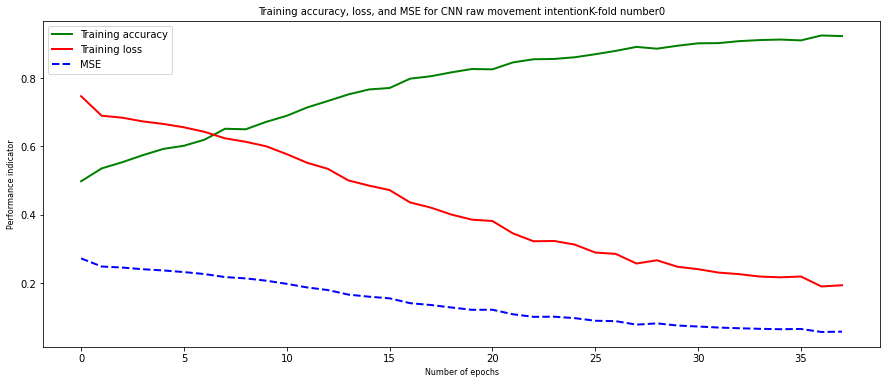

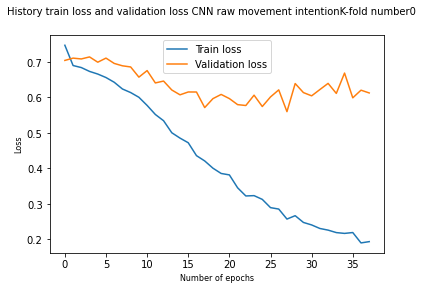

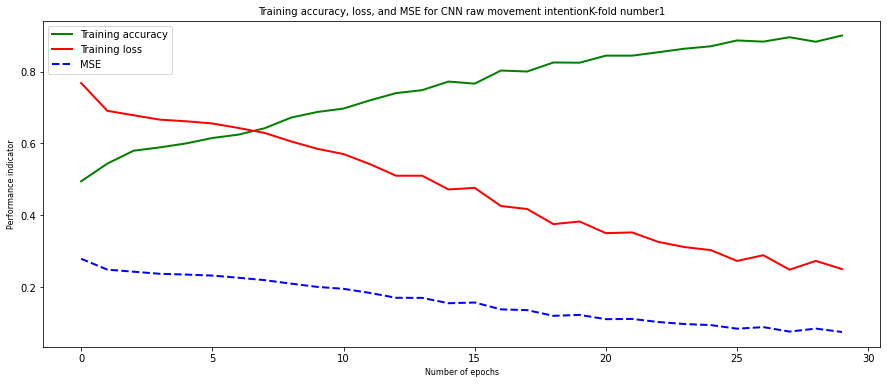

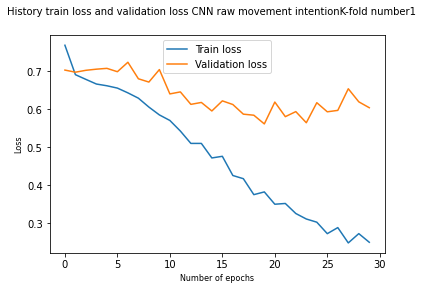

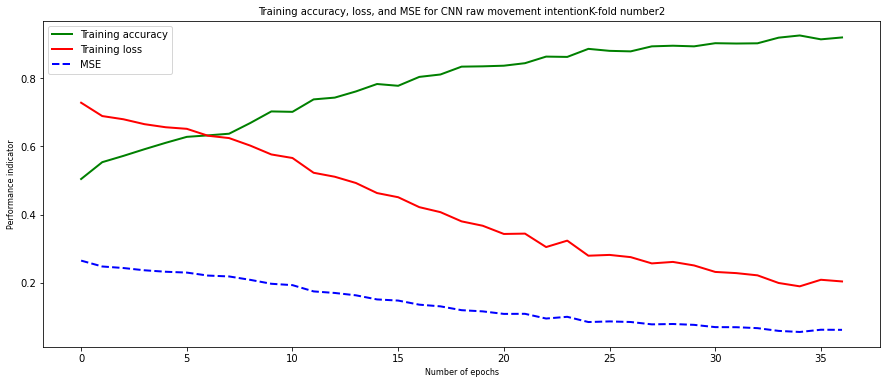

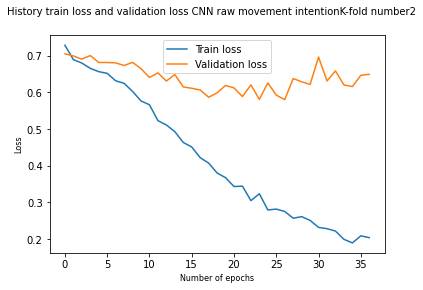

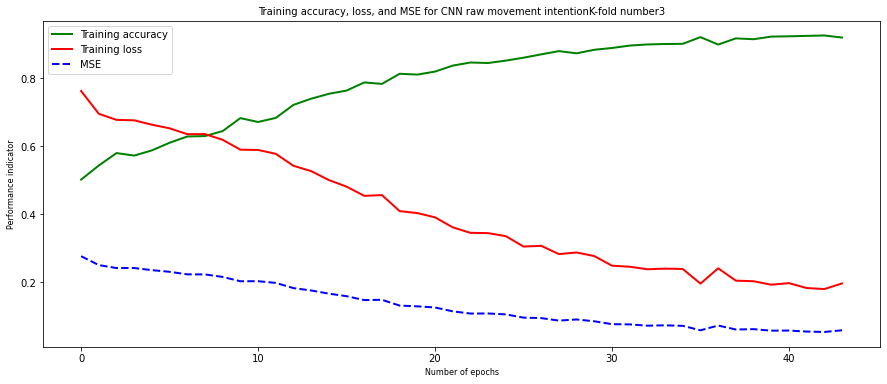

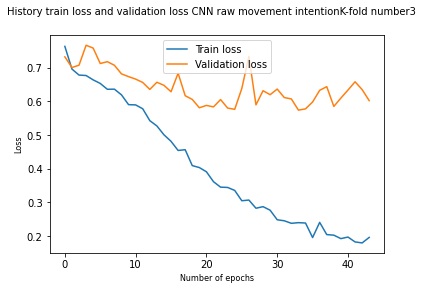

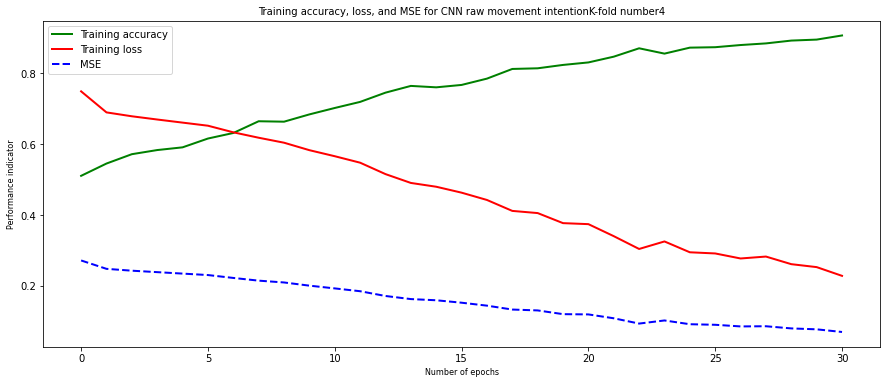

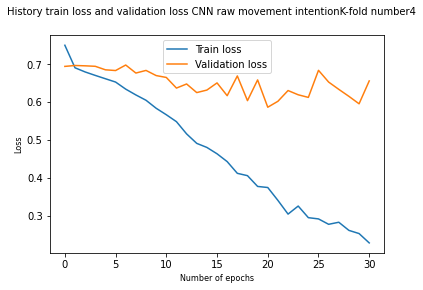

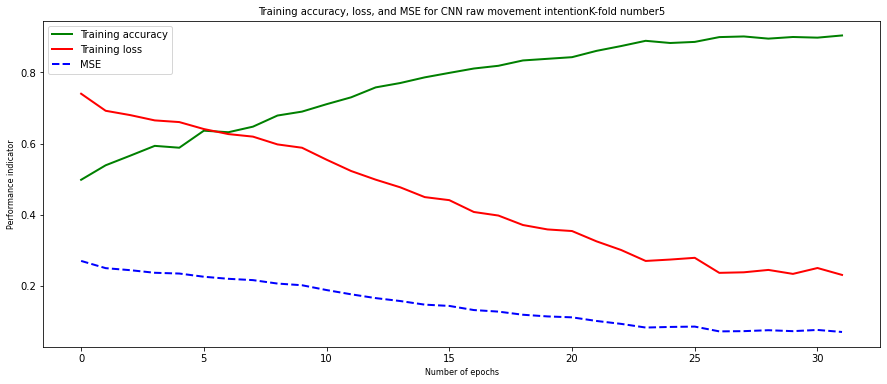

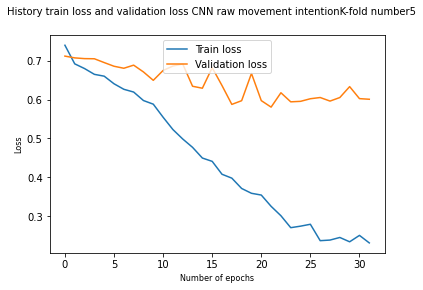

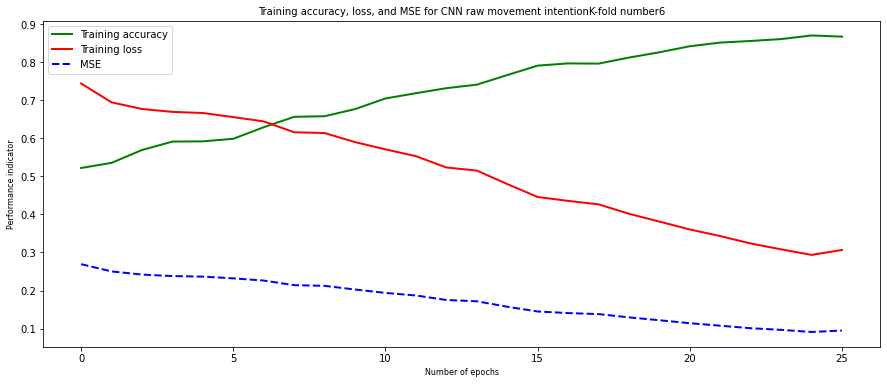

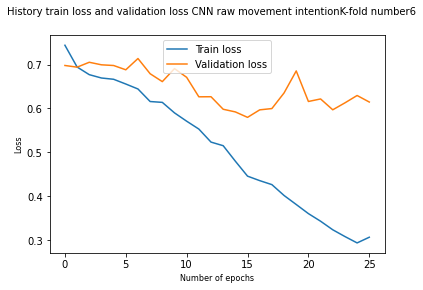

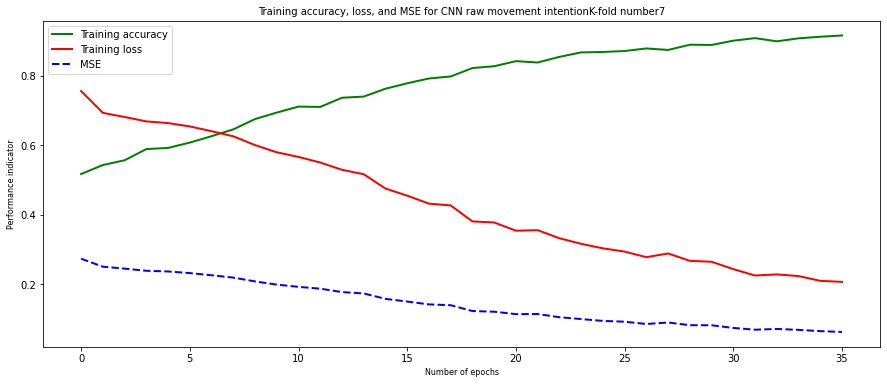

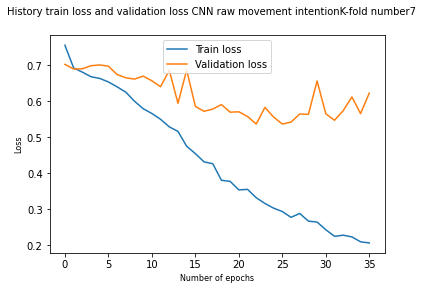

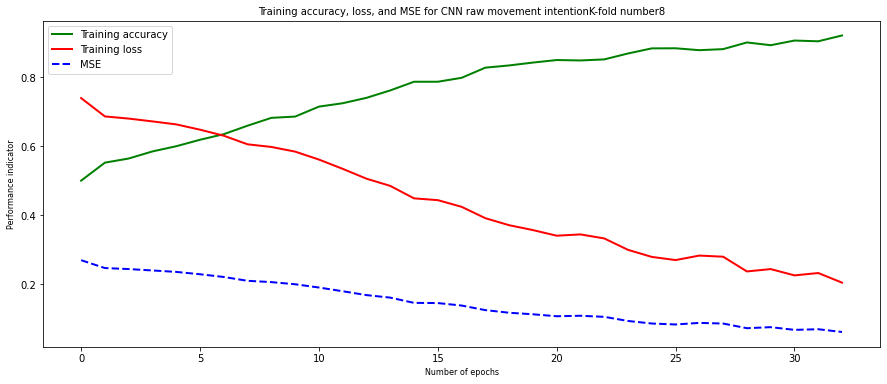

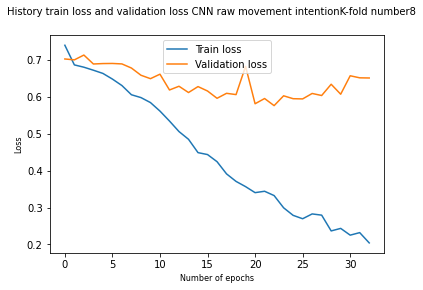

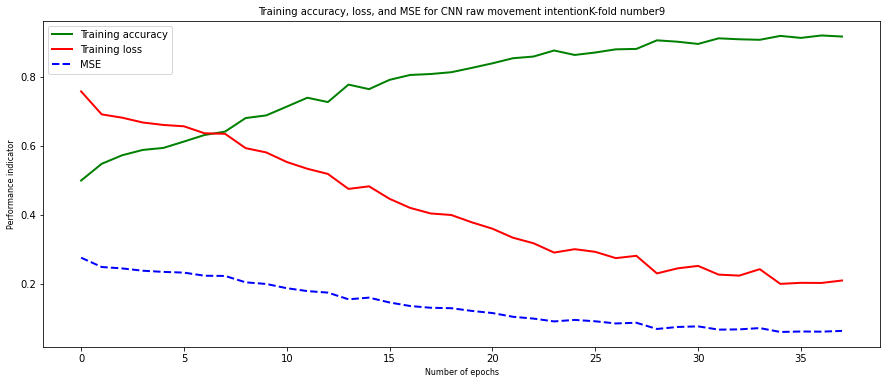

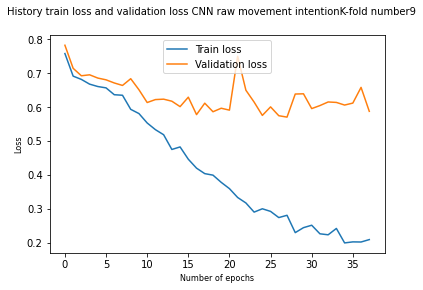

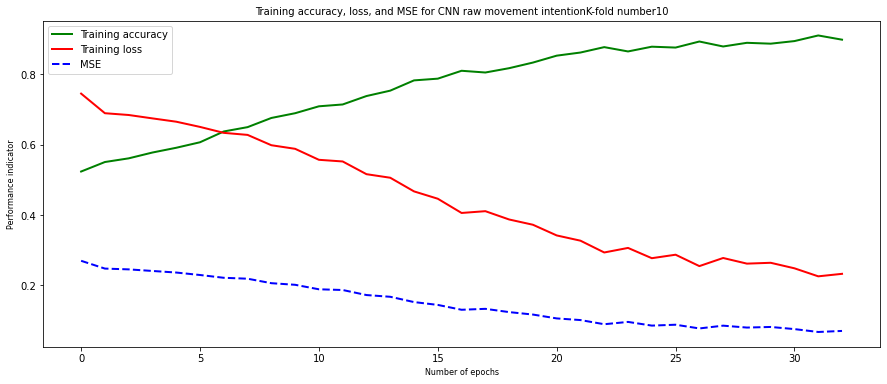

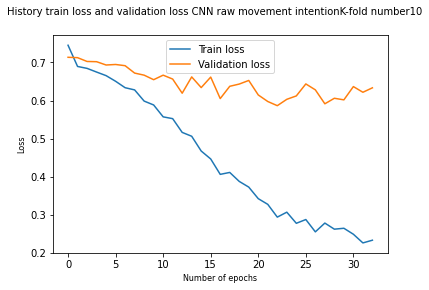

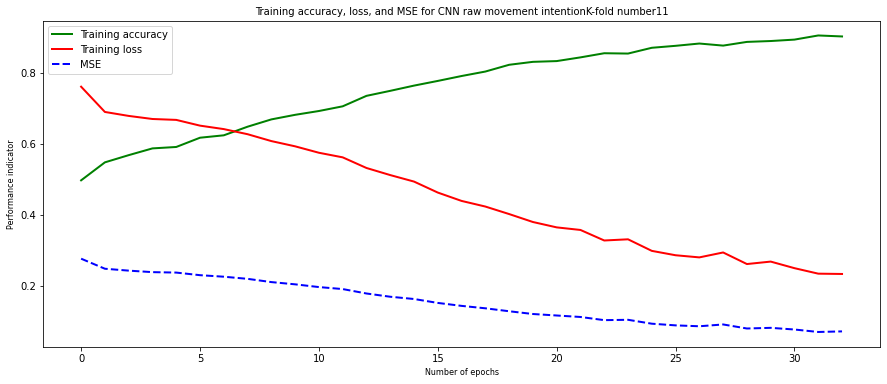

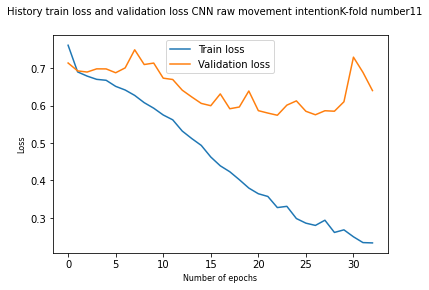

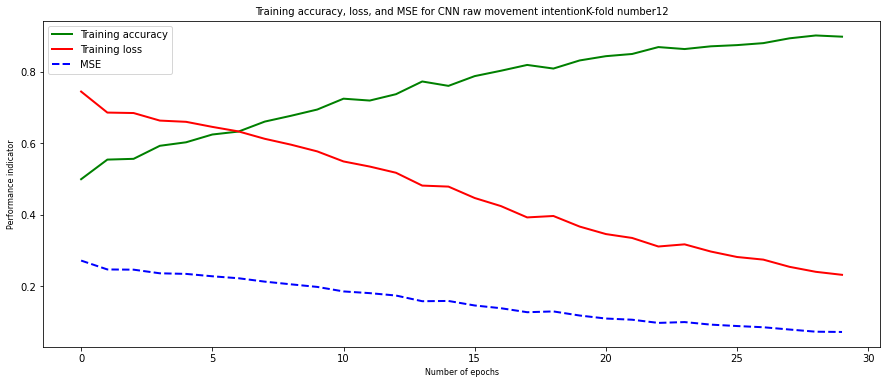

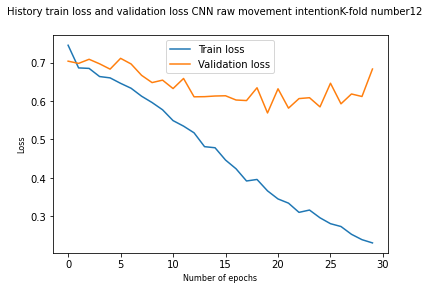

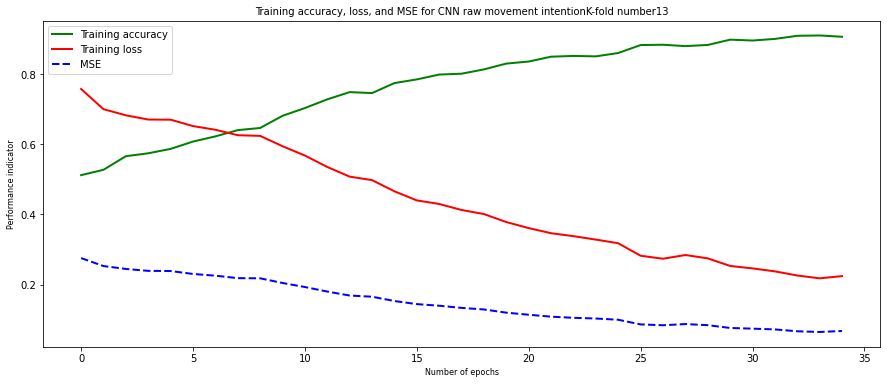

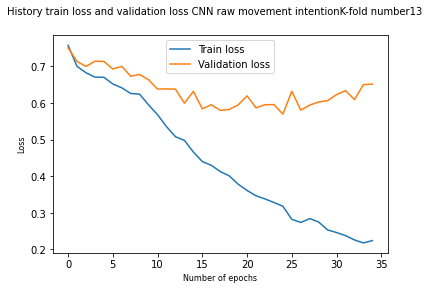

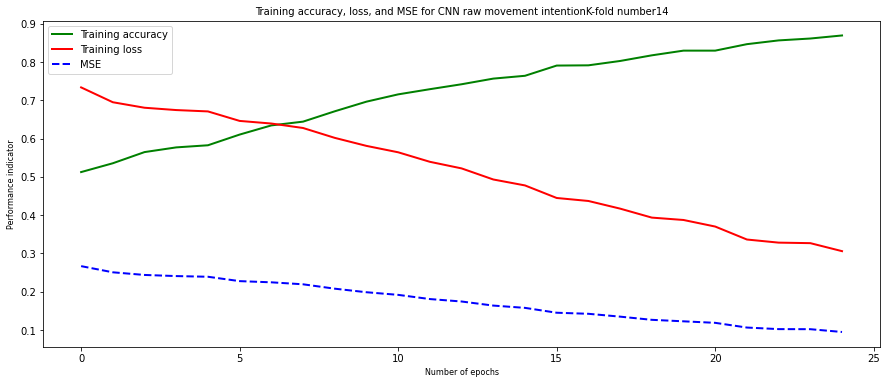

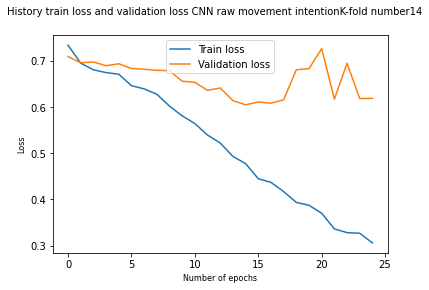

In [ ]:
#Training of CNN
# .....................
nb_channels=58
window_size=W1+W2
training_accuracies=[]
#test_f1score=[]
test_accuracies=[]
files= ['01','02','03','04','05','06','07','08','09','10','11','12','13','14', '15']#LEAVE ONE OUT 15, for test
accuracies={}
histories={}
training_time=[]

for g in range(len(files)):
  train_files= [files[:g]+ files[g+1:]]
  test_file=[files[g]]
  model, es, adam=run_model()

  for file in files:
    
    ###
      REACH_TENSOR, REACH_LABELS = add_data(W1=W1, W2=W2,k=file,event_label=['REACH'],EVENT=503587,nb_channels=nb_channels)
    
      REACH_TENSOR2, REACH_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                          event_label=['REACH'],EVENT=503588,nb_channels=nb_channels)
    
      GRASP_TENSOR, GRASP_LABELS = add_data(W1=W1, W2=W2,k=file,
                                          event_label=['GRASP'],EVENT=501794,nb_channels=nb_channels) 
      GRASP_TENSOR2, GRASP_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                          event_label=['GRASP'],EVENT=501795,nb_channels=nb_channels)
    
      try:
          FINAL_TENSOR=numpy.vstack((FINAL_TENSOR,REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
          labels=labels+REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2
        
      except NameError:
          FINAL_TENSOR=numpy.vstack((REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
          labels=REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2

  X_train, X_val, y_train, y_val = train_test_split(FINAL_TENSOR, labels, test_size =0.3, random_state=0)

  X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
  X_val=X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],1)

  print("x train shape", X_train.shape)
  print("x val shape", X_val.shape)
  print("y train length", len(y_train))
  print("y train length", len(y_val))

  del FINAL_TENSOR
  del REACH_TENSOR 
  del REACH_LABELS
  del REACH_TENSOR2 
  del REACH_LABELS2
  del GRASP_TENSOR
  del GRASP_LABELS
  del GRASP_TENSOR2
  del GRASP_LABELS2 

  onehot = LabelBinarizer()
  y_train = onehot.fit_transform(y_train)
  y_val = onehot.transform(y_val)
  ####
  start = time.time()
  TITLE= "Training accuracy, loss, and MSE for "+BIG_TITLE+ "K-fold number"+ str(g)

  histories[TITLE]= model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=10, callbacks=[es])#works with epochs = 10
  stop = time.time() 

  training_accuracies.append(histories[TITLE].history['accuracy'])
  training_time.append(stop - start)

  plot_training_history(histories[TITLE], TITLE)

  fig = plt.figure()
  pyplot.plot(histories[TITLE].history['loss'], label='Train loss')
  pyplot.plot(histories[TITLE].history['val_loss'], label='Validation loss')

  TITLE= "History train loss and validation loss "+BIG_TITLE+ "K-fold number"+ str(g)
  fig.suptitle(TITLE, fontsize=10)
  plt.xlabel('Number of epochs', fontsize=8)
  plt.ylabel('Loss', fontsize=8)

  pyplot.legend(loc='upper center')

  plt.savefig(str(TITLE)+'.png', bbox_inches='tight')
  plt.savefig(str(TITLE)+'.pdf', bbox_inches='tight')

  del X_train
  del X_val
  del y_train
  del y_val

###################################
  for file in test_file:
    REACH_TENSOR, REACH_LABELS = add_data(W1=W1, W2=W2,k=file,event_label=['REACH'],EVENT=503587,nb_channels=nb_channels)
    
    REACH_TENSOR2, REACH_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                         event_label=['REACH'],EVENT=503588,nb_channels=nb_channels)
    
    GRASP_TENSOR, GRASP_LABELS = add_data(W1=W1, W2=W2,k=file,
                                         event_label=['GRASP'],EVENT=501794,nb_channels=nb_channels) 
    GRASP_TENSOR2, GRASP_LABELS2 = add_data(W1=W1, W2=W2,k=file,
                                         event_label=['GRASP'],EVENT=501795,nb_channels=nb_channels)
    try:
        TEST_TENSOR=numpy.vstack((TEST_TENSOR,REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
        labels_test=labels_test+REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2
        
    except NameError:
        TEST_TENSOR=numpy.vstack((REACH_TENSOR,REACH_TENSOR2, GRASP_TENSOR, GRASP_TENSOR2))
        labels_test=REACH_LABELS+REACH_LABELS2+GRASP_LABELS+GRASP_LABELS2

  TEST_TENSOR, labels_test=random_shuffle(TEST_TENSOR, labels_test)
  TEST_TENSOR=TEST_TENSOR.reshape(TEST_TENSOR.shape[0],TEST_TENSOR.shape[1],TEST_TENSOR.shape[2],1)
  y_test = onehot.transform(labels_test)
  print("TEST_TENSOR shape:", TEST_TENSOR.shape)
  print("y test length:", len(y_test))

  test_loss, test_acc, test_mse = model.evaluate(TEST_TENSOR, y_test)
  test_accuracies.append(test_acc)

##storing for ROC curve
  y_pred = model.predict(TEST_TENSOR)
  y_pred_keras=y_pred.ravel()
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
  ROC= ["fpr_keras:", fpr_keras, "tpr_keras :", tpr_keras, "thresholds_keras:", thresholds_keras]
##storing for AUC curve
  auc_keras = auc(fpr_keras, tpr_keras)
  AUC= ["auc_keras:", auc_keras]

# Creating the Confusion Matrix
  y_pred_n=[]
  for i in y_pred:
    if i >= 0.5:
      y_pred_n.append(1)
    else:
      y_pred_n.append(0)
  y_pred= y_pred_n
#del y_pred_n
  cm = confusion_matrix(y_test, y_pred)
  print(cm)

  total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
  accuracy1=(cm[0,0]+cm[1,1])/float(total1)
  acc="Accuracy : %f" %(accuracy1*100)
  print("Accuracy : %f" %(accuracy1*100))

  sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
  sens="Sensitivity :%f" %(sensitivity1*100)
  print("Sensitivity :%f" %(sensitivity1*100))

  specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
  spe="Specificity :%f"%(specificity1*100)
  print("Specificity :%f"%(specificity1*100))

  precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
  pre="Precision :%f" %(precision1*100)
  print("Precision :%f" %(precision1*100))

  #F1score= 2*((precision1*sensitivity1)/(precision1+sensitivity1))
  #test_f1score.append(F1score)

  TITLE= "Test results & training time "+BIG_TITLE+ "K-fold number"+ str(g)


  with open(str(TITLE)+".csv", 'w', newline='', ) as file:
      writer = csv.writer(file)
      writer.writerow(["Test acc:", test_acc])
      writer.writerow(["Test loss:", test_loss])
      writer.writerow(["Test mse:", test_mse])
      writer.writerow(["ROC:", ROC])
      writer.writerow(["AUC:", AUC])
      writer.writerow(["CM:",cm])
      writer.writerow(["accuracy:",acc])
      writer.writerow(["sensitivity/recall:", sens])
      writer.writerow(["specificity:", spe])
      writer.writerow(["precision",pre])
      writer.writerow(["Training time:", training_time])

  del TEST_TENSOR
  del labels_test
  del y_test
  del y_pred


In [ ]:
import math

def variance(data, ddof=0):
  n = len(data)
  mean = sum(data) / n
  return sum((x - mean) ** 2 for x in data) / (n - ddof)

def stdev(data):
  var = variance(data)
  std_dev = math.sqrt(var)
  return std_dev

def Average(lst):
    return sum(lst) / len(lst)

SE_testacc= stdev(test_accuracies)
#SE_testf1= stdev(test_f1score)
Mean_accuracy= Average(test_accuracies)
#Mean_f1score= Average(test_f1score)

with open(str(BIG_TITLE+"SE")+".csv", 'w', newline='', ) as file:
      writer = csv.writer(file)
      writer.writerow(["SE_test accuracy", SE_testacc])
      writer.writerow(["Mean_accuracy", Mean_accuracy])
      #writer.writerow(["SE_test f1score", SE_testf1])
      #writer.writerow(["Mean_f1score", Mean_f1score])

In [ ]:
print("SE acc", SE_testacc*100)
#print("SE F1", SE_testf1*100)

In [ ]:
print("Mean acc", Mean_accuracy*100)
#print("Mean F1 score", Mean_f1score*100)

In [ ]:
test_accuracies

[0.9367088675498962,
 0.8500000238418579,
 0.9208860993385315,
 0.8774834275245667,
 0.809374988079071,
 0.8238993883132935,
 0.8538960814476013,
 0.852664589881897,
 0.8814102411270142,
 0.8798701167106628,
 0.7830188870429993,
 0.8962264060974121,
 0.8878205418586731,
 0.8525179624557495,
 0.8928571343421936]

In [ ]:
#test_f1score